# Week 10: Data Wrangling in Python

POP77001 Computer Programming for Social Scientists

Tom Paskhalis

## Overview

-   Numerical analysis in Python
-   Tabular data
-   Pandas object types
-   Working with dataframes in pandas
-   Data input and output

# Numerical Analysis in Python

## Built-in Facilities

-   As opposed to other programming languages (Julia, R, MatLab),  
    Python provides very bare bones functionality for numeric analysis.
-   E.g. no built-in matrix/array object type, limited mathematical and
    statistical functions.

. . .

In [ ]:
# Representing 3x3 matrix with list
mat = [[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]]

. . .

In [ ]:
# Subsetting 2nd row, 3rd element
mat[1][2]

6

. . .

In [ ]:
# Naturally, this representation
# breaks down rather quickly
mat * 2

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3], [4, 5, 6], [7, 8, 9]]

## NumPy

-   NumPy (**Num**eric **Py**thon) package provides the basis of
    numerical computing in Python:
    -   multidimensional array (tensor);
    -   mathematical functions for arrays;
    -   array data I/O;
    -   linear algebra, RNG, FFT, …

. . .

In [ ]:
# Using 'as' allows to avoid typing full name 
# each time the module is referred to
import numpy as np

## NumPy Array

-   Multidimensional array object is a principal container for data in
    Python:
    -   Can be used to represent vectors, matrices and
        higher-dimensional tensors.
    -   Can store images, audio, text, etc.
    -   Forms the backbone of data frames in pandas.
-   Number of dimensions (**axes**) depends on stored data:
    -   E.g. vector of numbers is 1D, colour video is 4D (T x H x W x
        3).
-   Arrays are homogeneous and mutable.

. . .

In [ ]:
vec = np.array([1, 2, 3])
vec

array([1, 2, 3])

. . .

In [ ]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

## NumPy Array: Example

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

. . .

In [ ]:
arr[1][2]

6

. . .

In [ ]:
arr * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

. . .

In [ ]:
# Object type
type(arr)

<class 'numpy.ndarray'>

. . .

In [ ]:
# Array dimensionality
arr.ndim

2

. . .

In [ ]:
# Array size
arr.shape

(3, 3)

. . .

In [ ]:
# Calculating summary statistics on array
# axis indicates the dimension
# compare to R's `apply(arr, 1, mean)`
# note that every list within a list
# is treated as a column (not row)
arr.mean(axis = 0)

array([4., 5., 6.])

## Array Indexing and Slicing

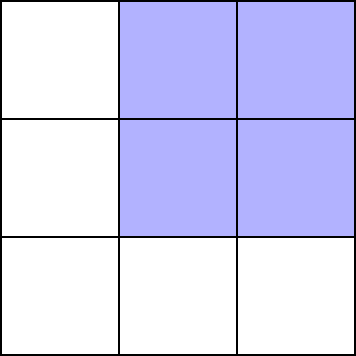

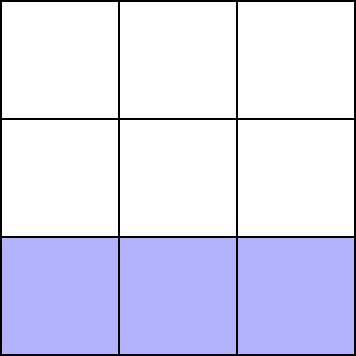

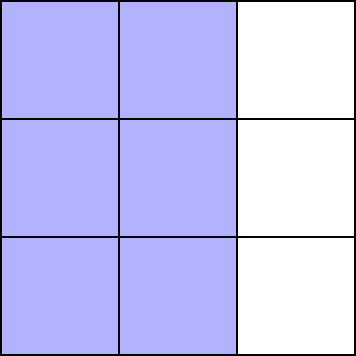

**Expression**

``` python
arr[:2, 1:]
```

  
  

``` python
arr[2]
arr[2, :]
arr[2:, :]
```

  
  

``` python
arr[:, :2]
```

**Shape**

``` python
(2, 2)
```

  
  

``` python
(3,)
(3,)
(1, 3)
```

  
  

``` python
(3, 2)
```

# Rectangular Data

## Tidy Data

-   Tidy data is a specific subset of rectangular data, where:
    -   Each variable is in a column
    -   Each observation is in a row
    -   Each value is in a cell

. . .

![](https://r4ds.hadley.nz/images/tidy-1.png)

> **Source**
>
> [R for Data Science](https://r4ds.hadley.nz/data-tidy#sec-tidy-data)

## Pandas

-   Standard Python library does not have data type for rectangular
    data.
-   However, `pandas` library has become the de facto standard for data
    manipulation.
-   `pandas` is built upon (and often used in conjunction with) other
    computational libraries:
    -   E.g. `scipy` (linear algebra), `statsmodels` (statistical
        models) and `scikit-learn` (machine learning)

. . .

In [ ]:
import pandas as pd

## Core `pandas` Object Types

-   **Series** - one-dimensional sequence of values with an index.
-   **DataFrame** - (typically) two-dimensional rectangular table of
    data.
-   The key difference from NumPy arrays is that DataFrame can contain
    columns with different types.

## Series

-   **Series** is a one-dimensional array-like object.
-   It contains a sequence of values and an associated array of data
    labels, called **index**.

In [ ]:
ser = pd.Series([150.0, 120.0, 3000.0])
ser

0     150.0
1     120.0
2    3000.0
dtype: float64

. . .

In [ ]:
ser.index # Retrieve index attribute

RangeIndex(start=0, stop=3, step=1)

. . .

In [ ]:
ser.dtype # Retrieve data type attribute

dtype('float64')

. . .

In [ ]:
ser[:2] # Slicing is similar to standard Python objects

0    150.0
1    120.0
dtype: float64

. . .

In [ ]:
ser[ser > 200] # But subsetting with masks is also available

2    3000.0
dtype: float64

## Indexing in Series

-   Another way to think about Series is as a ordered dictionary.

In [ ]:
d = {'apple': 150.0, 'banana': 120.0, 'watermelon': 3000.0}

. . .

In [ ]:
# Alternatively, we could have constructed this Series:
# ser = pd.Series(
#   [150.0, 120.0, 3000.0],
#   index=['apple', 'banana', 'watermelon']
# )
ser = pd.Series(d)
ser

apple          150.0
banana         120.0
watermelon    3000.0
dtype: float64

. . .

In [ ]:
ser[:2] # This slicing would be impossible for standard dictionary

apple     150.0
banana    120.0
dtype: float64

. . .

In [ ]:
ser[['apple', 'banana']] # But we can also use labels

apple     150.0
banana    120.0
dtype: float64

. . .

In [ ]:
ser.index # Sequence of labels is converted into an Index object

Index(['apple', 'banana', 'watermelon'], dtype='object')

## DataFrame

-   **DataFrame** is a rectangular table of data.
-   It is a workhorse of data analysis in `pandas`.

. . .

In [ ]:
# DataFrame can be constructed from
# a dict of equal-length lists/arrays
data = {
  'fruit': ['apple', 'banana', 'watermelon'],
  'weight': [150.0, 120.0, 3000.0],
  'berry': [False, True, True]
}
df = pd.DataFrame(data)
df

        fruit  weight  berry
0       apple   150.0  False
1      banana   120.0   True
2  watermelon  3000.0   True

# Working with<br>Data Frames

## Indexing in DataFrame

-   DataFrame has both row (axis 0) and column (axis 1) indices.
-   `DataFrame.iloc()` provides method for *index* location
-   `DataFrame.loc()` provides method for *label* location

. . .

In [ ]:
df.iloc[0] # First row

fruit     apple
weight    150.0
berry     False
Name: 0, dtype: object

. . .

In [ ]:
df.iloc[:, 0] # First column by index

0         apple
1        banana
2    watermelon
Name: fruit, dtype: object

. . .

In [ ]:
df.loc[:, 'fruit'] # First column by label

0         apple
1        banana
2    watermelon
Name: fruit, dtype: object

## Summary of Indexing in DataFrame

| Expression | Selection Operation |
|:---------------------|:-------------------------------------------------|
| `df[val]` | Column or sequence of columns +convenience (e.g. slice) |
| `df.loc[lab_i]` | Row or subset of rows by label |
| `df.loc[:, lab_j]` | Column or subset of columns by label |
| `df.loc[lab_i, lab_j]` | Both rows and columns by label |
| `df.iloc[i]` | Row or subset of rows by integer position |
| `df.iloc[:, j]` | Column or subset of columns by integer position |
| `df.iloc[i, j]` | Both rows and columns by integer position |
| `df.at[lab_i, lab_j]` | Single scalar value by row and column label |
| `df.iat[i, j]` | Single scalar value by row and column integer position |

> **Extra**
>
> [Pandas documentation on
> indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

## Subsetting in DataFrame

In [ ]:
df.iloc[:2] # Select the first two rows (with convenience shortcut for slicing)

    fruit  weight  berry
0   apple   150.0  False
1  banana   120.0   True

. . .

In [ ]:
df[:2]  # Shortcut

    fruit  weight  berry
0   apple   150.0  False
1  banana   120.0   True

. . .

In [ ]:
df.loc[:, ['fruit', 'berry']] # Select the columns 'fruit' and 'berry'

        fruit  berry
0       apple  False
1      banana   True
2  watermelon   True

. . .

In [ ]:
df[['fruit', 'berry']] # Shortcut

        fruit  berry
0       apple  False
1      banana   True
2  watermelon   True

## Columns in DataFrame

In [ ]:
df.columns # Retrieve the names of all columns (index object)

Index(['fruit', 'weight', 'berry'], dtype='object')

. . .

In [ ]:
df.columns[0] # This Index object is subsettable

'fruit'

. . .

In [ ]:
df.columns.str.startswith('fr') # As column names are strings, we can apply str methods

array([ True, False, False])

. . .

In [ ]:
df.iloc[:,df.columns.str.startswith('fr')] # This is helpful with more complicated column selection criteria

        fruit
0       apple
1      banana
2  watermelon

## Filtering in DataFrame

In [ ]:
# Select rows where fruits are not berries
df[df.loc[:,'berry'] == False]

   fruit  weight  berry
0  apple   150.0  False

. . .

In [ ]:
# The same can be achieved with more concise syntax
df[df['berry'] == False]

   fruit  weight  berry
0  apple   150.0  False

. . .

In [ ]:
# Create new dataset with rows where weight is higher than 200
weight200 = df[df['weight'] > 200]
weight200

        fruit  weight  berry
2  watermelon  3000.0   True

## Manipulating Columns in DataFrame

In [ ]:
# Columns can be renamed with dictionary mapping
df = df.rename(columns = {'weight': 'weight_g'})
df

        fruit  weight_g  berry
0       apple     150.0  False
1      banana     120.0   True
2  watermelon    3000.0   True

. . .

In [ ]:
# Columns can be added or modified by assignment
df['weight_oz'] = 0
df

        fruit  weight_g  berry  weight_oz
0       apple     150.0  False          0
1      banana     120.0   True          0
2  watermelon    3000.0   True          0

. . .

In [ ]:
df['weight_oz'] = df['weight_g'] * 0.04
df

        fruit  weight_g  berry  weight_oz
0       apple     150.0  False        6.0
1      banana     120.0   True        4.8
2  watermelon    3000.0   True      120.0

. . .

In [ ]:
df['weight_oz'] = round(df['weight_oz'], 1)
df

        fruit  weight_g  berry  weight_oz
0       apple     150.0  False        6.0
1      banana     120.0   True        4.8
2  watermelon    3000.0   True      120.0

## Variable Transformation

-   Lambda functions can be used to transform data with `map()` method

In [ ]:
df['fruit'].map(lambda x: x.upper())

0         APPLE
1        BANANA
2    WATERMELON
Name: fruit, dtype: object

. . .

In [ ]:
transform = lambda x: x.capitalize()

. . .

In [ ]:
transformed = df['fruit'].map(transform)

. . .

In [ ]:
transformed

0         Apple
1        Banana
2    Watermelon
Name: fruit, dtype: object

## Piping in `pandas`

-   While there is no special syntax (like `%>%`/`|>` in R), `pandas`
    provides a `pipe()` method to chain operations.

In [ ]:
df = pd.DataFrame({
  'fruit': ['apple', 'banana', 'watermelon'],
  'weight': [150.0, 120.0, 3000.0],
  'berry': [False, True, True]
})

. . .

In [ ]:
df = (
  df
  .pipe(lambda x: x.rename(columns = {'weight': 'weight_g'}))
  .pipe(lambda x: x.assign(
    fruit = x['fruit'].map(lambda x: x.capitalize()),
    weight_oz = round(x['weight_g'] * 0.04, 1))
  )
)
df

        fruit  weight_g  berry  weight_oz
0       Apple     150.0  False        6.0
1      Banana     120.0   True        4.8
2  Watermelon    3000.0   True      120.0

# Data I/O

## Data Formats

| Format | Readability | Platform | Speed | Compression | Persistence |
|:---------|:---------------|:---------------|:-------|:----------|:------------|
| `csv` | ✅ Human-readable | ✅ Cross-platform | ❌ Slow | ❌ No | ✅ Long-term |
| `rds` | ❌ Binary | ❌ R only | ✅ Fast | ✅ Yes | ✅ Long-term |
| `pickle` | ❌ Binary | ❌ Python only | ✅ Fast | ✅ Yes | ✅ Long-term |
| `parquet` | ❌ Binary | ✅ Cross-platform | ✅ Fast | ✅ Yes | ✅ Long-term |
| `feather` | ❌ Binary | ✅ Cross-platform | ✅ Fast | ✅ Yes | ❌ Short-term |

## File Object

-   File object in Python provides the main interface to external files.
-   In contrast to other core types, file objects are created not with a
    literal, but with a function, `open()`:

. . .

    <variable_name> = open(<filepath>, <mode>)

  

. . .

In [ ]:
# Create a new file object in write mode
f = open('../temp/test.txt', 'w')

## Data Input and Output

-   Modes of file objects allow to:
    -   (`r`)ead a file (default);
    -   (`w`)rite an object to a file;
    -   e(`x`)clusively create, failing if a file exists;
    -   (`a`)ppend to a file;
-   `r+` mode if you need to read and write to file.

## Data Output: Example

In [ ]:
# Create a new file object in write mode
f = open('../temp/test.txt', 'w')

. . .

In [ ]:
# Write a string of characters to it
f.write('This is a test file.')

20

. . .

In [ ]:
# Flush output buffers to disk and close the connection
f.close()

## Data Input: Example

-   To avoid keeping track of open file connections, `with` statement
    can be used:

. . .

In [ ]:
# Note that we use 'r' mode for reading
with open('../temp/test.txt', 'r') as f:
    text = f.read()

. . .

In [ ]:
text

'This is a test file.'

> **Extra**
>
> [Python documentation on with
> statement](https://docs.python.org/3.10/reference/compound_stmts.html#with)

## Data I/O in `pandas`

-   `pandas` provides high-level methods that takes care of file
    connections.
-   These methods all follow the same `read_<format>` and `to_<format>`
    name patterns.
-   CSV (comma-separated value) files are the standard of
    interoperability.

. . .

    <variable_name> = pd.read_<format>(<filepath>)

  

. . .

    <variable_name>.to_<format>(<filepath>)

  

. . .

In [ ]:
df.to_csv('../temp/df.csv', index = False)

  

. . .

In [ ]:
df = pd.read_csv('../temp/df.csv')
df

        fruit  weight_g  berry  weight_oz
0       Apple     150.0  False        6.0
1      Banana     120.0   True        4.8
2  Watermelon    3000.0   True      120.0

## Real Data: Example

-   We will use the data from [Kaggle](https://www.kaggle.com) [2022
    Machine Learning and Data Science
    Survey](https://www.kaggle.com/c/kaggle-survey-2022/)
-   For more information you can read the [executive
    summary](https://www.kaggle.com/kaggle-survey-2022)
-   Or explore the [winning Python Jupyter
    Notebooks](https://www.kaggle.com/competitions/kaggle-survey-2022/discussion/372587)

In [ ]:
# We specify that we want to combine first two rows as a header
kaggle2022 = pd.read_csv(
    '../data/kaggle_survey_2022_responses.csv',
    header = [0,1]
)

<string>:2: DtypeWarning: Columns (208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.

## Visual Data Inspection

In [ ]:
kaggle2022.head() # Returns the top n (n=5 default) rows

  Duration (in seconds)  ...                                                                                                                         Q44_12
  Duration (in seconds)  ... Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
0                   121  ...                                                NaN                                                                            
1                   462  ...                                                NaN                                                                            
2                   293  ...                                                NaN                                                                            
3                   851  ...                                                NaN                                                                            
4                   232  ...                                    

. . .

In [ ]:
kaggle2022.tail() # Returns the bottom n (n=5 default) rows

      Duration (in seconds)  ...                                                                                                                         Q44_12
      Duration (in seconds)  ... Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
23992                   331  ...                                                NaN                                                                            
23993                   330  ...                                                NaN                                                                            
23994                   860  ...                                                NaN                                                                            
23995                   597  ...                                                NaN                                                                            
23996                   303  ...        

## Data Summary: Numeric Variables

-   DataFrame methods in pandas automatically handle (exclude) missing
    data (`NaN`)

. . .

In [ ]:
# DataFrame.describe() provides an range of summary statistics
kaggle2022.describe()

      Duration (in seconds)  ...                                                                                                                        Q44_11
      Duration (in seconds)  ... Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None
count          2.399700e+04  ...                                                0.0                                                                           
mean           1.009010e+04  ...                                                NaN                                                                           
std            1.115403e+05  ...                                                NaN                                                                           
min            1.200000e+02  ...                                                NaN                                                                           
25%            2.640000e+02  ...              

. . .

In [ ]:
# Rather than using describe(),
# we can apply individual methods
kaggle2022.iloc[:,0].mean()

10090.095845313997

. . .

In [ ]:
kaggle2022.iloc[:,0].median() # Median

414.0

. . .

In [ ]:
kaggle2022.iloc[:,0].std() # Standard deviation

111540.30746801202

. . .

In [ ]:
## We don't have to rely only on methods provided by `pandas`
import statistics
statistics.stdev(kaggle2022.iloc[:,0])

111540.30746801202

## Data Summary: Categorical Variables

In [ ]:
# Adding include = 'all' tells pandas to summarize all variables
kaggle2022.describe(include = 'all')

       Duration (in seconds)  ...                                                                                                                         Q44_12
       Duration (in seconds)  ... Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
count           2.399700e+04  ...                                                835                                                                            
unique                   NaN  ...                                                  1                                                                            
top                      NaN  ...                                              Other                                                                            
freq                     NaN  ...                                                835                                                                            
mean            1.009010e+04  ... 

. . .

In [ ]:
# Mode, most frequent value
kaggle2022.iloc[:,2].mode()

0    Man
Name: (Q3, What is your gender? - Selected Choice), dtype: object

## Data Summary: Tabulation

In [ ]:
# Counts of unique values
kaggle2022.iloc[:,2].value_counts()

(Q3, What is your gender? - Selected Choice)
Man                        18266
Woman                       5286
Prefer not to say            334
Nonbinary                     78
Prefer to self-describe       33
Name: count, dtype: int64

. . .

In [ ]:
# We can further normalize them by the number of rows
kaggle2022.iloc[:,2].value_counts(normalize = True)

(Q3, What is your gender? - Selected Choice)
Man                        0.761178
Woman                      0.220278
Prefer not to say          0.013918
Nonbinary                  0.003250
Prefer to self-describe    0.001375
Name: proportion, dtype: float64

## Descriptive Statistics Methods

| Method | Numeric | Categorical | Description |
|:------------|:-------|:------------|:--------------------------------------|
| `count` | yes | yes | Number of non-NA observations |
| `value_counts` | yes | yes | Number of unique observations by value |
| `describe` | yes | yes | Set of summary statistics for Series/DataFrame |
| `min`, `max` | yes | yes (caution) | Minimum and maximum values |
| `quantile` | yes | no | Sample quantile ranging from 0 to 1 |
| `sum` | yes | yes (caution) | Sum of values |
| `prod` | yes | no | Product of values |
| `mean` | yes | no | Mean |
| `median` | yes | no | Median (50% quantile) |
| `var` | yes | no | Sample variance |
| `std` | yes | no | Sample standard deviation |
| `skew` | yes | no | Sample skewness (third moment) |
| `kurt` | yes | no | Sample kurtosis (fourth moment) |

## Next

-   Tutorial: Reading/writing and reshaping data in Python
-   Next week: Classes and Object-oriented programming